In [56]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

import pandas as pd
import numpy as np
import yfinance as yf
import matplotlib.dates as mpl_dates
import matplotlib.pyplot as plt

import collin_risk as collin
daily_close = collin.get_stock_close_data(stocks = ['BTC-USD'], start_date = '2021-01-01', end_date = '2022-08-13', interval = '1wk')

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
[*********************100%***********************]  1 of 1 completed


In [57]:
daily_close

,BTC-USD
2021-01-01,39371.042969
2021-01-08,39187.328125
2021-01-15,30825.699219
2021-01-22,33466.097656
2021-01-29,36926.066406
...,...
2022-07-15,23164.628906
2022-07-22,23843.886719
2022-07-29,22630.957031
2022-08-05,23957.529297


In [58]:
def isSupport(daily_close,i):
  support = daily_close['BTC-USD'][i] < daily_close['BTC-USD'][i-1]  and daily_close['BTC-USD'][i] < daily_close['BTC-USD'][i+1] and daily_close['BTC-USD'][i+1] < daily_close['BTC-USD'][i+2] and daily_close['BTC-USD'][i-1] < daily_close['BTC-USD'][i-2]
  return support

In [59]:
levels = []
for i in range(2,daily_close.shape[0]-2):
  if isSupport(daily_close,i):
    levels.append((i,daily_close['BTC-USD'][i]))

In [60]:
levels

[(2, 30825.69921875),
 (27, 31780.73046875),
 (38, 43790.89453125),
 (55, 37138.234375)]

In [61]:
data = yf.download(tickers = 'BTC-USD', start = '2021-01-01', end_date = '2022-08-13', interval = '1wk')

[*********************100%***********************]  1 of 1 completed


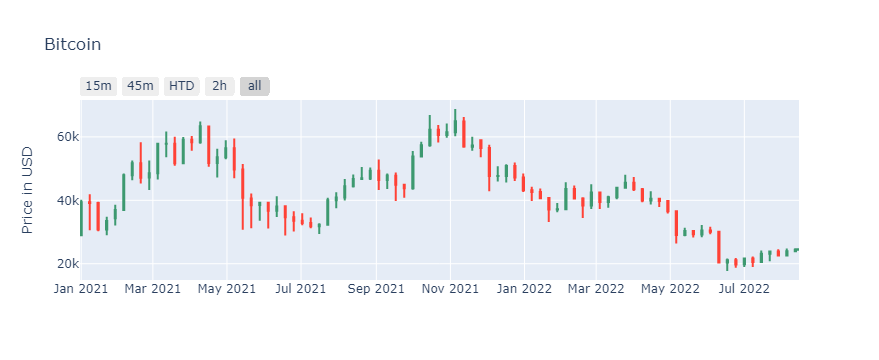

In [62]:
#Data Visualization
import plotly.graph_objs as go

#declare figure
fig = go.Figure()

#Candlestick
fig.add_trace(go.Candlestick(x = data.index,
                            open = data['Open'],
                            high = data['High'],
                            low = data['Low'],
                            close = data['Close'], name = 'market data'))

# Add Titles
fig.update_layout(
    title = "Bitcoin",
    yaxis_title = "Price in USD")

# X Axes
fig.update_xaxes(
    rangeslider_visible = False,
    rangeselector = dict(
        buttons = list([
                dict(count=15, label = "15m", step = "minute", stepmode = "backward"),
                dict(count=45, label = "45m", step = "minute", stepmode = "backward"),
                dict(count=1, label = "HTD", step = "hour", stepmode = "todate"),
                dict(count=2, label = "2h", step = "hour", stepmode = "backward"),
                dict(step = "all")
        ])))

#Show
fig.show()

AttributeError: module 'matplotlib.pyplot' has no attribute 'levels'